# Análise por sexo

Importando as bibliotecas que serão utilizadas e os dados para o dataframe de vacinação em Recife-PE.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('vacinados.csv',sep=';',encoding ='UTF-8',header = 0)
data


,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),219VCD270W,2.0,2021-10-19,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD206Z,1.0,2021-07-26,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2.0,2021-03-04,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-11,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),32010BD,3.0,2021-10-07,CENTRO DE VACINAÇÃO UNINASSAU
...,...,...,...,...,...,...,...,...,...
3407293,***.619.454-**,NECIRA FERREIRA DE SANTANA,FEMININO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407294,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,2.0,2021-03-11,DRIVE THRU GERALDÃO
3407295,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407296,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-17,DRIVE THRU GERALDÃO


Retirando as colunas que não serão utilizadas para análise, a fim de facilitar a visualização do dataframe.

In [10]:
data =  data.drop(columns=['cpf','nome','grupo','vacina','lote','data_vacinacao','local_vacinacao',])
data.head()

,sexo,dose
0,MASCULINO,2.0
1,MASCULINO,1.0
2,FEMININO,2.0
3,FEMININO,1.0
4,FEMININO,3.0


Filtrando o dataframe: removendo os valores ausentes

In [11]:
# removendo valores ausentes
dt = data.dropna()



Separando os dados para análise por sexo + dose; Total, 1ª dose, 2ª dose, 3ª dose e 4ª dose.

In [12]:
# Masculino  
masculino_total = dt['sexo'] == 'MASCULINO'
masculino_1dose = (dt['sexo'] == 'MASCULINO') & (dt['dose'] == 1)
masculino_2dose = (dt['sexo'] == 'MASCULINO') & (dt['dose'] == 2)
masculino_3dose = (dt['sexo'] == 'MASCULINO') & (dt['dose'] == 3)
masculino_4dose = (dt['sexo'] == 'MASCULINO') & (dt['dose'] == 4)
# Feminino
feminino_total = dt['sexo'] == 'FEMININO'
feminino_1dose = (dt['sexo'] == 'FEMININO') & (dt['dose'] == 1)
feminino_2dose = (dt['sexo'] == 'FEMININO') & (dt['dose'] == 2)
feminino_3dose = (dt['sexo'] == 'FEMININO') & (dt['dose'] == 3)
feminino_4dose = (dt['sexo'] == 'FEMININO') & (dt['dose'] == 4)
# Outros 
outros_total = dt['sexo'] == 'OUTROS'
outros_1dose = (dt['sexo'] == 'OUTROS') & (dt['dose'] == 1)
outros_2dose = (dt['sexo'] == 'OUTROS') & (dt['dose'] == 2)
outros_3dose = (dt['sexo'] == 'OUTROS') & (dt['dose'] == 3)
outros_4dose = (dt['sexo'] == 'OUTROS') & (dt['dose'] == 4)

# Vizualizando dados
Devido às características do objeto de análise, a comparação quantitativa é a melhor opção. Dito isso, a melhor escolha de gráfico para visualização se torna o gráfico de "pizza".

# Total de vacinação realizada em Recife separada por sexo:


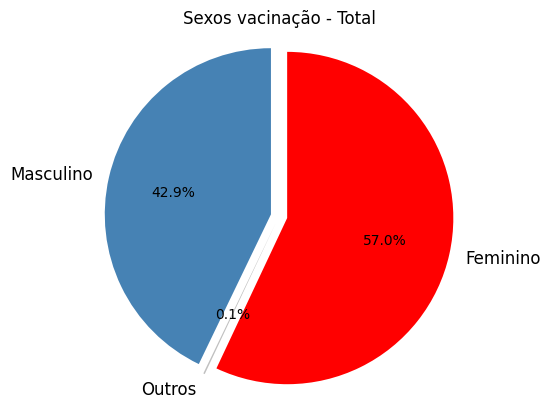

In [24]:
qtdmasculino = dt[masculino_total].count()[0]
qtdfeminino = dt[feminino_total].count()[0]
qtdoutros = dt[outros_total].count()[0]

valores = [qtdmasculino, qtdoutros, qtdfeminino]
rotulos = ['Masculino','Outros', 'Feminino']

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 12
ax1.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'silver','red'], explode=(0.05, 0.05, 0.05))
plt.title('Sexos vacinação - Total')
ax1.axis('equal')
plt.show()

Pegando como análise todas as vacinações realizadas, incluindo 1ª, 2ª, 3ª e 4ª doses, percebe-se ligeira maioria de mulheres entre as declarações de sexo. Resultado indica maior número declaradas mulheres na população de Recife.

# Vacinação 1ª dose realizada em Recife separada por sexo:

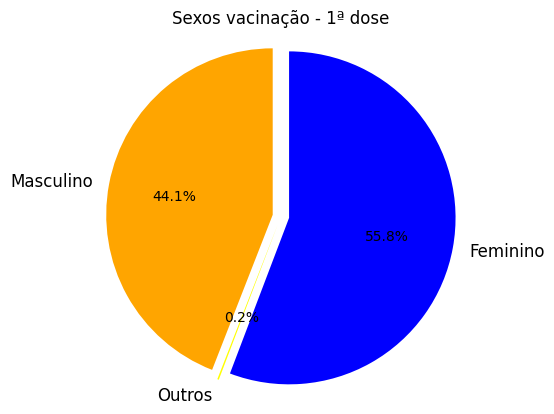

In [45]:
qtdmasculino1 = dt[masculino_1dose].count()[0]
qtdfeminino1 = dt[feminino_1dose].count()[0]
qtdoutros1 = dt[outros_1dose].count()[0]

valores = [qtdmasculino1, qtdoutros1, qtdfeminino1]
rotulos = ['Masculino','Outros', 'Feminino']

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 12
ax1.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['orange', 'yellow','blue'], explode=(0.05, 0.05, 0.05))
plt.title('Sexos vacinação - 1ª dose')
ax1.axis('equal')
plt.show()

Na 1ª dose os números indicam uma ligeira semelhança se comparado aos números de vacinação total, compreensível já que conforme visto na análise de números por doses, a 1ª dose representa uma adesão maior da população. Porém, uma diferença de aproximadamente 2% de declarados homens e declaradas mulheres. A proporção de declarados Outros sexos continua ligeiramente a mesma, com um aumento de 0,01%.

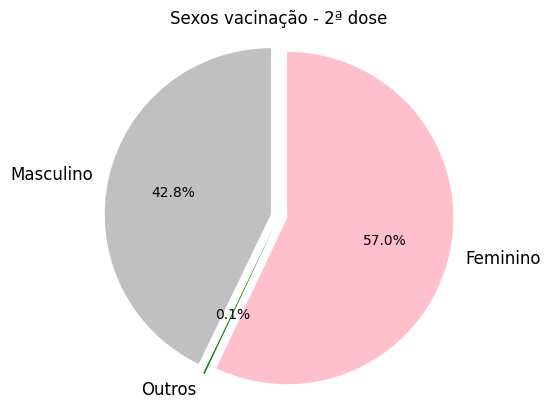

In [46]:
qtdmasculino2 = dt[masculino_2dose].count()[0]
qtdfeminino2 = dt[feminino_2dose].count()[0]
qtdoutros2 = dt[outros_2dose].count()[0]

valores = [qtdmasculino2, qtdoutros2, qtdfeminino2]
rotulos = ['Masculino','Outros', 'Feminino']

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 12
ax1.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['silver', 'green','pink'], explode=(0.05, 0.05, 0.05))
plt.title('Sexos vacinação - 2ª dose')
ax1.axis('equal')
plt.show()

Na 2ª dose, a proporção volta a ser completamente igual comparado ao total, mas uma variação de aproximadamente 1,5% da adesão dos homens e mulheres da 1ª dose. A proporção de declarados Outros sexos continua a mesma.

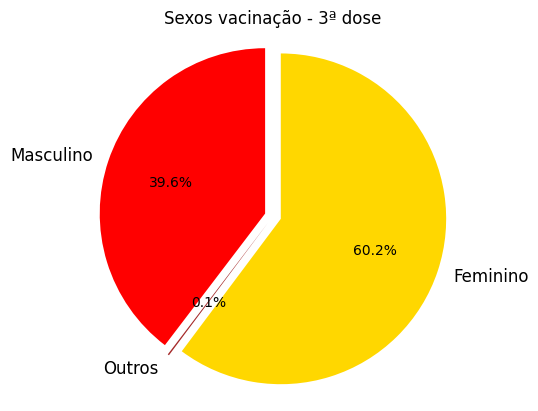

In [47]:
qtdmasculino3 = dt[masculino_3dose].count()[0]
qtdfeminino3 = dt[feminino_3dose].count()[0]
qtdoutros3 = dt[outros_3dose].count()[0]

valores = [qtdmasculino3, qtdoutros3, qtdfeminino3]
rotulos = ['Masculino','Outros', 'Feminino']

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 12
ax1.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['red', 'brown','gold'], explode=(0.05, 0.05, 0.05))
plt.title('Sexos vacinação - 3ª dose')
ax1.axis('equal')
plt.show()

Na 3ª dose, ocorre uma variação maior, a proporção de mulheres se torna uma significante maioria, levando entender que grande quantidade de homens recifenses deixaram de se vacinar a partir da 2ª dose. A proporção de declarados Outos sexos continua a mesma.

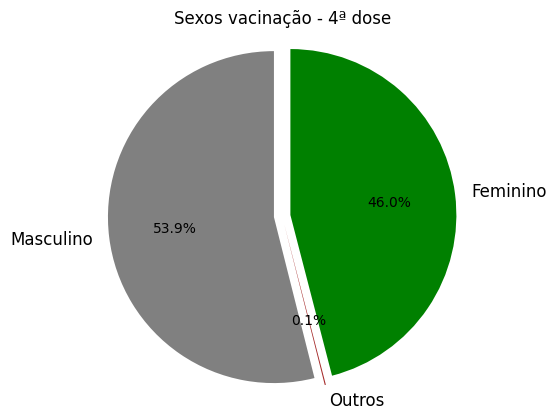

In [41]:
qtdmasculino4 = dt[masculino_4dose].count()[0]
qtdfeminino4 = dt[feminino_4dose].count()[0]
qtdoutro1
fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 12
ax1.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['gray', 'brown','green'], explode=(0.05, 0.05, 0.05))
plt.title('Sexos vacinação - 4ª dose')
ax1.axis('equal')
plt.show()

Na 4ª dose, já se observa um cenário bem diferente, a maioria se vira para os declarados homens. Isso pode ser justificado devido ao baixissíma quantidade de doses tomadas, conforme visto na análise de doses. Com isso, se torna ainda inconclusivo a real proporção entre as vacinas tomadas -